In [1]:
import pandas as pd

In [2]:
train_data=pd.read_csv('/mnt/c/Users/parte/Desktop/MLops/ml/data/train.csv')

In [3]:
train_data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
train_data.isnull().sum()


id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
train_data.shape

(193573, 11)

In [6]:
train_data.describe() 

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [8]:
train_data.drop(['id'],axis=1,inplace=True)

In [9]:
train_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [10]:
train_data.duplicated().sum()

0

In [11]:
cat_cols=train_data.select_dtypes(include='object').columns
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [12]:
num_cols=train_data.select_dtypes(exclude='object').columns
num_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [13]:
for col in cat_cols:
    print(train_data[col].value_counts())
    print('-----------------------------------')


cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
-----------------------------------
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
-----------------------------------
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
-----------------------------------


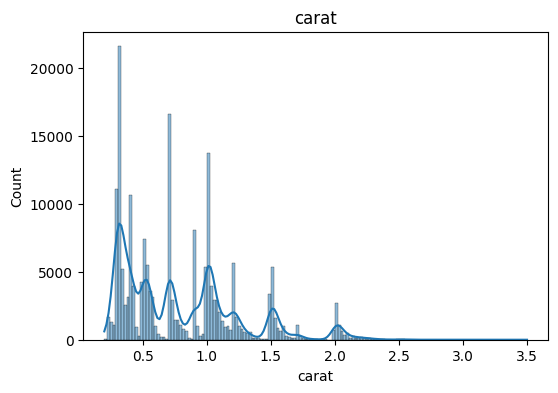

-----------------------------------


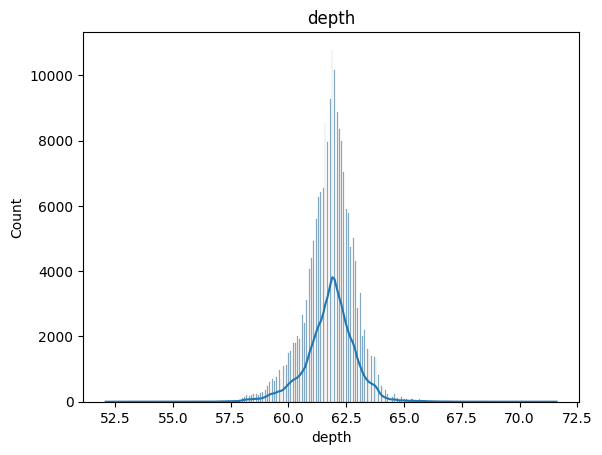

-----------------------------------


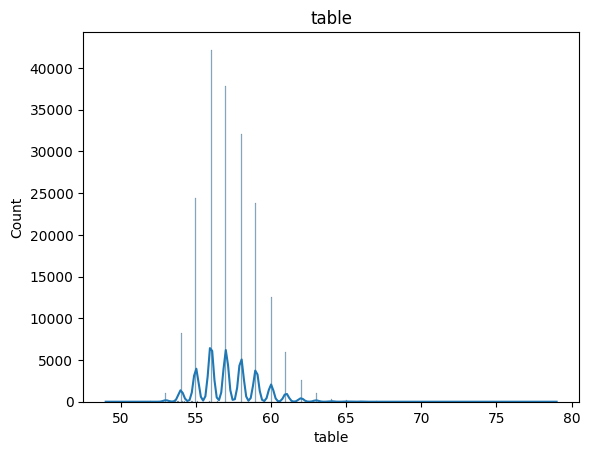

-----------------------------------


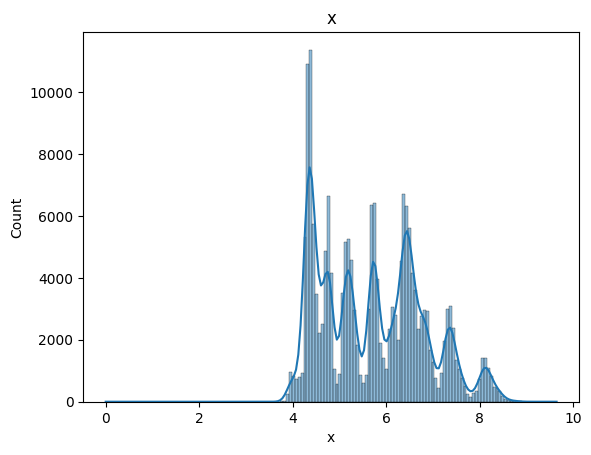

-----------------------------------


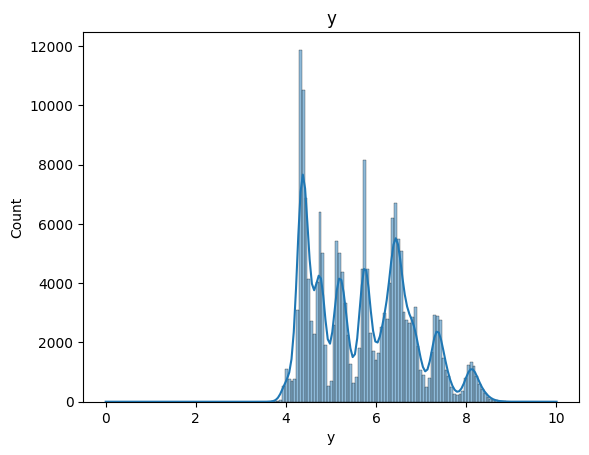

-----------------------------------


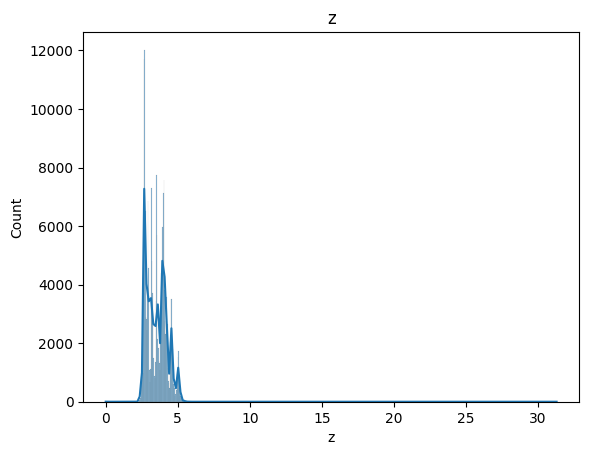

-----------------------------------


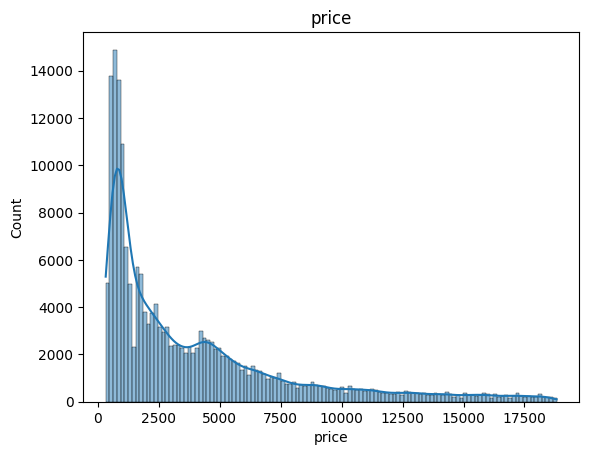

-----------------------------------


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))

for col in num_cols:
    sns.histplot(train_data[col],kde=True)
    plt.title(col)
    plt.show()
    print('-----------------------------------')

<Axes: >

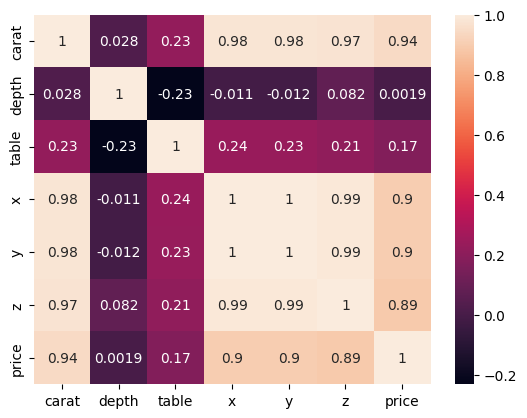

In [15]:
sns.heatmap(train_data[num_cols].corr(),annot=True)

<Axes: xlabel='x', ylabel='price'>

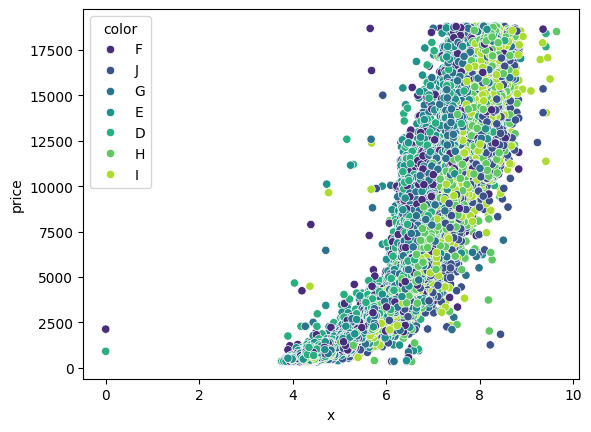

In [16]:
sns.scatterplot(x='x',y='price',data=train_data,hue='color',palette='viridis')

In [17]:
# cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
# clarity_map={'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
# color_map={'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}

In [18]:
# train_data['cut']=train_data['cut'].map(cut_map)
# train_data['clarity']=train_data['clarity'].map(clarity_map)
# train_data['color']=train_data['color'].map(color_map)

In [19]:
train_data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [20]:
X=train_data.drop('price',axis=1)
y=train_data['price']

In [21]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [22]:
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='mean')),
        ('scaler',StandardScaler())
    ]
)

In [23]:
cut_cat=['Fair','Good','Very Good','Premium','Ideal']
color_cat=['D','E','F','G','H','I','J']
clarity_cat=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [24]:
cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OrdinalEncoder(categories=[cut_cat,color_cat,clarity_cat]))
    ]
)

In [25]:
num_cols=X.select_dtypes(exclude='object').columns
cat_cols=X.select_dtypes(include='object').columns

In [26]:
preprocess=ColumnTransformer(
    transformers=[
        ('num_pipeline',num_pipeline,num_cols),
        ('cat_pipeline',cat_pipeline,cat_cols)
    ]
)

In [30]:
train=preprocess.fit_transform(X)

In [28]:
test_data=pd.read_csv('/mnt/c/Users/parte/Desktop/MLops/ml/data/test.csv')  

In [29]:
test_data.drop(['id'],axis=1,inplace=True)

In [31]:
test=preprocess.transform(test_data)

In [34]:
train=pd.DataFrame(train,columns=preprocess.get_feature_names_out())
test=pd.DataFrame(test,columns=preprocess.get_feature_names_out())

In [35]:
test

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.952454,0.443215,-0.639801,-1.086435,-1.070545,-1.036762,4.0,0.0,3.0
1,-0.044712,0.905449,-0.639801,0.103377,0.135990,0.211568,2.0,2.0,1.0
2,-0.174390,0.073427,-2.203246,0.049294,0.018058,0.022867,4.0,5.0,3.0
3,-0.995680,-0.203914,-1.160949,-1.149531,-1.179405,-1.167401,4.0,3.0,5.0
4,0.884642,0.813002,-0.639801,0.932639,0.970585,1.024434,2.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...
129045,-0.152777,0.165874,-0.639801,0.031267,0.054345,0.051898,4.0,0.0,5.0
129046,-0.196003,-2.052853,2.487090,0.049294,0.018058,-0.151318,3.0,0.0,2.0
129047,0.473997,0.443215,0.402496,0.653214,0.625861,0.690579,3.0,3.0,5.0
129048,1.208836,0.165874,-0.639801,1.203051,1.233664,1.227651,4.0,0.0,0.0


In [36]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [37]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':xgb.XGBRegressor()
}

In [38]:
train_model_list=[]
model_list=[]
r2_score_list=[]

In [40]:
def evaluate(y,y_pred):
    r2=r2_score(y,y_pred)
    mae=mean_absolute_error(y,y_pred)
    mse=mean_squared_error(y,y_pred)
    return mse,mae,r2

In [42]:
for model in list(models):
    cur=models[model]
    cur.fit(train,y)
    y_pred=cur.predict(train)
    mse,mae,r2=evaluate(y,y_pred)
    print(f'{model} : mse={mse}, mae={mae}, r2={r2}')
    r2_score_list.append(r2)
    print("="*50)
    print("\n")


LinearRegression : mse=1029958.1761638481, mae=675.6452634087468, r2=0.9367195599068726


Lasso : mse=1030193.3530839299, mae=676.900903050684, r2=0.9367051106803439


Ridge : mse=1029958.2534509853, mae=675.6669846692757, r2=0.9367195551583651


ElasticNet : mse=2302682.381732554, mae=1054.5105258093704, r2=0.858523619810028


RandomForestRegressor : mse=51637.14382867427, mae=115.62030277232681, r2=0.9968274234214043


XGBRegressor : mse=274539.6920287269, mae=278.60437674772504, r2=0.9831323623657227


